<a href="https://colab.research.google.com/github/ni-ms/colab-projects/blob/linear-classification/Linear_classification_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_breast_cancer
import tensorflow as tf
data = load_breast_cancer()

In [ ]:
# type(data)
data.data.shape
# data.target
# data.target_names
# data.feature_names

# All data is the same!


(569, 30)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data.data,data.target, test_size=0.33)

In [ ]:
N,D = X_train.shape
N,D

(381, 30)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# model = tf.keras.models.Sequential([
#      tf.keras.layers.Input(shape=(D,)),
#      tf.keras.layers.Dense(1, activation='sigmoid')
#  ])
# model loading fails after you save if you explicitly have input layer for some reason

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1, input_shape=(D,), activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']);

In [ ]:
r = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=100)

Epoch 1/100
12/12 [==============================] - 1s 28ms/step - loss: 0.9200 - accuracy: 0.4436 - val_loss: 1.0002 - val_accuracy: 0.4468
Epoch 2/100
12/12 [==============================] - 0s 7ms/step - loss: 0.8388 - accuracy: 0.5066 - val_loss: 0.9102 - val_accuracy: 0.5266
Epoch 3/100
12/12 [==============================] - 0s 6ms/step - loss: 0.7660 - accuracy: 0.5932 - val_loss: 0.8307 - val_accuracy: 0.5798
Epoch 4/100
12/12 [==============================] - 0s 8ms/step - loss: 0.7034 - accuracy: 0.6509 - val_loss: 0.7597 - val_accuracy: 0.6489
Epoch 5/100
12/12 [==============================] - 0s 7ms/step - loss: 0.6479 - accuracy: 0.6929 - val_loss: 0.6982 - val_accuracy: 0.6649
Epoch 6/100
12/12 [==============================] - 0s 6ms/step - loss: 0.6014 - accuracy: 0.7218 - val_loss: 0.6437 - val_accuracy: 0.7074
Epoch 7/100
12/12 [==============================] - 0s 7ms/step - loss: 0.5590 - accuracy: 0.7559 - val_loss: 0.5973 - val_accuracy: 0.7287
Epoch 8/100


In [ ]:
print("Train score", model.evaluate(X_train, Y_train))
print("Test score", model.evaluate(X_test, Y_test))

12/12 [==============================] - 0s 2ms/step - loss: 0.1111 - accuracy: 0.9764
Train score [0.11108066886663437, 0.9763779640197754]
6/6 [==============================] - 0s 3ms/step - loss: 0.0949 - accuracy: 0.9734
Test score [0.094893679022789, 0.9734042286872864]


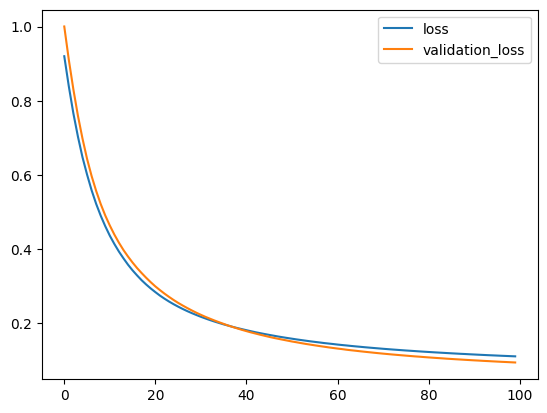

In [ ]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='validation_loss')
plt.legend()

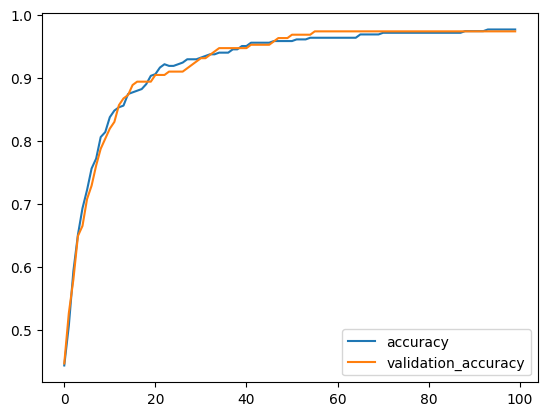

In [ ]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='validation_accuracy')
plt.legend()

In [ ]:
P = model.predict(X_test)

6/6 [==============================] - 0s 2ms/step


In [ ]:
# Round the probabilities and flatten these predictions
# Shape (D, 1):
# Represents a column vector with D elements.
# It has D rows and 1 column.
# Essentially, it’s a 2D array with a single column.
# Example: If D = 3, the shape would be (3, 1).
# Shape (D,):
# Represents a 1D array (also called a flat array or vector).
# It has D elements along a single dimension.
# Essentially, it’s a 1D array.
# Example: If D = 3, the shape would be (3).

In [ ]:
import numpy as np
P = np.round(P).flatten()
print(P)

[1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1.
 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1.
 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1.
 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0.
 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0.
 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1.
 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1.]


In [ ]:
print("Manually calculated accuracy: ", np.mean(P == Y_test))
# == does element wise comparision, mean is sum / total
print("Evaluate output:", model.evaluate(X_test, Y_test))

Manually calculated accuracy:  0.973404255319149
6/6 [==============================] - 0s 2ms/step - loss: 0.0949 - accuracy: 0.9734
Evaluate output: [0.094893679022789, 0.9734042286872864]


In [ ]:
model.save('linearclassification.keras')

In [ ]:
!ls -lh

total 44K
-rw-r--r-- 1 root root  20K May 21 14:46 linearclassification.h5
-rw-r--r-- 1 root root  17K May 21 14:46 linearclassification.keras
drwxr-xr-x 1 root root 4.0K May 17 13:37 sample_data


In [ ]:
model = tf.keras.models.load_model('linearclassification.keras')
print(model.layers)
model.evaluate(X_test, Y_test)

6/6 [==============================] - 0s 3ms/step - loss: 0.0949 - accuracy: 0.9734


[0.094893679022789, 0.9734042286872864]